In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
import datetime
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from kneed import DataGenerator, KneeLocator
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import make_scorer


In [13]:
data_c=pd.read_csv('data_clean.csv')
data_c.head()
#data_c['years_customer'] is in days


FileNotFoundError: [Errno 2] No such file or directory: 'data_clean.csv'

In [5]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2237 non-null   int64  
 1   Unnamed: 0.1         2237 non-null   int64  
 2   ID                   2237 non-null   int64  
 3   Year_Birth           2237 non-null   int64  
 4   Education            2237 non-null   object 
 5   Marital_Status       2237 non-null   object 
 6   Income               2237 non-null   float64
 7   Kidhome              2237 non-null   int64  
 8   Teenhome             2237 non-null   int64  
 9   Dt_Customer          2237 non-null   object 
 10  Recency              2237 non-null   int64  
 11  MntWines             2237 non-null   int64  
 12  MntFruits            2237 non-null   int64  
 13  MntMeatProducts      2237 non-null   int64  
 14  MntFishProducts      2237 non-null   int64  
 15  MntSweetProducts     2237 non-null   i

In [6]:
# I will only keep summarized features and theoreticly interesting to client in the porpose of clusification.
data_b=data_c.drop('Dt_Customer', 'AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','MntWines','MntFruits',
                   'MntMeatProducts','MntFishProducts',  'MntSweetProducts', ,'MntGoldProds', axis=1)
data_b.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ID', 'Year_Birth', 'Education',
       'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'any_promo',
       'Total_products', 'Total_spent', 'days_customer'],
      dtype='object')

In [7]:
categorical=data_c.select_dtypes('object')
#print(categorical)
data_dropped=data_c.drop(['Education' ,'Marital_Status'], axis=1)
data_c=pd.concat([data_dropped , pd.get_dummies(categorical)], axis=1)
data_c

,Unnamed: 0,Unnamed: 0.1,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,0,0,5524,1957,58138.0,0,0,58,635,88,...,0,1,0,0,0,0,0,1,0,0
1,1,1,2174,1954,46344.0,1,1,38,11,1,...,0,1,0,0,0,0,0,1,0,0
2,2,2,4141,1965,71613.0,0,0,26,426,49,...,0,1,0,0,0,0,0,0,1,0
3,3,3,6182,1984,26646.0,1,0,26,11,4,...,0,1,0,0,0,0,0,0,1,0
4,4,4,5324,1981,58293.0,1,0,94,173,43,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,2232,2235,10870,1967,61223.0,0,1,46,709,43,...,0,1,0,0,0,1,0,0,0,0
2233,2233,2236,4001,1946,64014.0,2,1,56,406,0,...,0,0,0,1,0,0,0,0,1,0
2234,2234,2237,7270,1981,56981.0,0,0,91,908,48,...,0,1,0,0,1,0,0,0,0,0
2235,2235,2238,8235,1956,69245.0,0,1,8,428,30,...,0,0,1,0,0,0,0,0,1,0


In [8]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2237 non-null   int64  
 1   Unnamed: 0.1             2237 non-null   int64  
 2   ID                       2237 non-null   int64  
 3   Year_Birth               2237 non-null   int64  
 4   Income                   2237 non-null   float64
 5   Kidhome                  2237 non-null   int64  
 6   Teenhome                 2237 non-null   int64  
 7   Recency                  2237 non-null   int64  
 8   MntWines                 2237 non-null   int64  
 9   MntFruits                2237 non-null   int64  
 10  MntMeatProducts          2237 non-null   int64  
 11  MntFishProducts          2237 non-null   int64  
 12  MntSweetProducts         2237 non-null   int64  
 13  MntGoldProds             2237 non-null   int64  
 14  NumDealsPurchases       

In [9]:
#data_c.isnull().any()
#data_c.Income=data_c.Income.astype('int')
#data_c.info()

In [10]:
data_p=data_c.drop(['Unnamed: 0','Unnamed: 0.1','ID'], axis=1)
data_p

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1957,58138.0,0,0,58,635,88,546,172,88,...,0,1,0,0,0,0,0,1,0,0
1,1954,46344.0,1,1,38,11,1,6,2,1,...,0,1,0,0,0,0,0,1,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,0,1,0,0,0,0,0,0,1,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,0,1,0,0,0,0,0,0,1,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,1967,61223.0,0,1,46,709,43,182,42,118,...,0,1,0,0,0,1,0,0,0,0
2233,1946,64014.0,2,1,56,406,0,30,0,0,...,0,0,0,1,0,0,0,0,1,0
2234,1981,56981.0,0,0,91,908,48,217,32,12,...,0,1,0,0,1,0,0,0,0,0
2235,1956,69245.0,0,1,8,428,30,214,80,30,...,0,0,1,0,0,0,0,0,1,0


In [36]:
#print(pd.DataFrame(X).duplicated().sum())
print(pd.DataFrame(data_p).duplicated().sum())
data_p.drop_duplicates(subset=None, keep='first', inplace=True)
data_p.duplicated().sum()

0


0

In [80]:
# Scale the data:

scaler=StandardScaler()
scaler.fit(data_p)
X=scaler.transform(data_p)
X

array([[-1.01917418,  0.2840051 , -0.82879993, ...,  1.89066397,
        -0.58222251, -0.18922034],
       [-1.27649415, -0.26567443,  1.0316974 , ...,  1.89066397,
        -0.58222251, -0.18922034],
       [-0.33298758,  0.91203051, -0.82879993, ..., -0.52891472,
         1.7175564 , -0.18922034],
       ...,
       [ 1.03938561,  0.23008114, -0.82879993, ..., -0.52891472,
        -0.58222251, -0.18922034],
       [-1.1049475 ,  0.80166582, -0.82879993, ..., -0.52891472,
         1.7175564 , -0.18922034],
       [-1.27649415,  0.03843435,  1.0316974 , ..., -0.52891472,
        -0.58222251, -0.18922034]])

In [38]:
sum_sqrd=[]
for n in range(1,20):
    model_km=KMeans(n_clusters=n, random_state=24)
    model_km=model_km.fit(X)
    sum_sqrd.append(model_km.inertia_)
    
sum_sqrd   

[78051.99999999984,
 64500.94553827027,
 60215.865953623164,
 57306.673995096564,
 55707.03900703768,
 53131.98907186297,
 51859.62094521466,
 50469.40843775719,
 48772.29272122515,
 47372.77112005464,
 46748.76413499105,
 44580.058331324035,
 44215.2185377586,
 42918.466563692884,
 41890.95739479018,
 40345.12512584033,
 39888.80105111577,
 39067.931220714745,
 38512.41467252412]

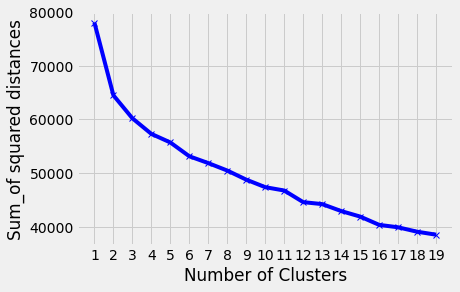

In [39]:

plt.style.use("fivethirtyeight")
plt.plot(range(1, 20),sum_sqrd , 'bx-')
plt.xticks(range(1, 20))
plt.xlabel('Number of Clusters')
plt.ylabel('Sum_of squared distances')
plt.show()

In [40]:
kl = KneeLocator(range(1, 20), sum_sqrd, curve="convex", direction="decreasing")
kl.elbow

6

In [41]:
model_km=KMeans(n_clusters=6, n_init =10,  max_iter=400, random_state=24)
model_km=model_km.fit(X)
model_km.predict(X)

array([4, 0, 4, ..., 2, 2, 0])

In [42]:
model_km.labels_
labels=model_km.predict(X)


In [43]:
# Calculate Silhoutte Score

score = silhouette_score(X, model_km.labels_, metric='euclidean')

print('Silhouetter Score:', round(score, 3))

Silhouetter Score: 0.139


In [44]:
# The lowest sum of squered distances value
print(model_km.inertia_)

# Final locations of the centroid
print(model_km.cluster_centers_[:1])

# The number of iterations required to converge
model_km.n_iter_


53131.98907186297
[[ 0.21672839 -0.74292206  0.6554404  -0.0842735   0.02266222 -0.77909968
  -0.53972491 -0.6391779  -0.55306729 -0.53198723 -0.55117429 -0.16764203
  -0.71594665 -0.71794327 -0.78880002  0.43122058 -0.00768914 -0.25093771
  -0.27764082 -0.2607252  -0.1032333   0.03175792 -0.15975081 -0.31920699
  -0.84319436 -0.91228824 -0.19415338  0.08936694 -0.15632947  0.02822023
   0.01025239 -0.04770242 -0.00979258  0.00135469 -0.04417261  0.03880766
   0.00107337 -0.06689488]]


24

In [45]:
# Create labeled data:
df1=pd.DataFrame(X, columns=data_p.columns)
df1
df2=pd.DataFrame(labels)
df2.set_axis(['labels'], axis=1, inplace=True)
df2
data_l=pd.concat([df1,df2], axis=1)
data_l

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,labels
0,-1.019174,0.284005,-0.828800,-0.932842,0.311777,0.983442,1.556997,1.703399,2.463332,1.457295,...,0.998054,-0.446168,-0.528915,-0.341923,-0.794641,-0.044173,1.890664,-0.582223,-0.18922,4
1,-1.276494,-0.265674,1.031697,0.897203,-0.378335,-0.871281,-0.635224,-0.718018,-0.646369,-0.627632,...,0.998054,-0.446168,-0.528915,-0.341923,-0.794641,-0.044173,1.890664,-0.582223,-0.18922,0
2,-0.332988,0.912031,-0.828800,-0.932842,-0.792402,0.362229,0.574278,-0.175441,1.347498,-0.148338,...,0.998054,-0.446168,-0.528915,-0.341923,-0.794641,-0.044173,-0.528915,1.717556,-0.18922,4
3,1.296706,-1.183733,1.031697,-0.932842,-0.792402,-0.871281,-0.559630,-0.655241,-0.500030,-0.579702,...,0.998054,-0.446168,-0.528915,-0.341923,-0.794641,-0.044173,-0.528915,1.717556,-0.18922,0
4,1.039386,0.291229,1.031697,-0.932842,1.553978,-0.389767,0.423090,-0.215798,0.158495,-0.004550,...,-1.001949,-0.446168,1.890664,-0.341923,1.258431,-0.044173,-0.528915,-0.582223,-0.18922,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049,0.696292,-0.030893,1.031697,-0.932842,-0.895919,-0.877226,-0.307650,-0.664209,-0.536614,-0.627632,...,0.998054,-0.446168,-0.528915,-0.341923,-0.794641,-0.044173,-0.528915,1.717556,-0.18922,0
2050,-0.161441,0.427787,-0.828800,0.897203,-0.102290,1.203393,0.423090,0.071185,0.085326,2.176235,...,0.998054,-0.446168,-0.528915,-0.341923,1.258431,-0.044173,-0.528915,-0.582223,-0.18922,4
2051,1.039386,0.230081,-0.828800,-0.932842,1.450461,1.794883,0.549080,0.228128,-0.097598,-0.364020,...,0.998054,-0.446168,-0.528915,2.924635,-0.794641,-0.044173,-0.528915,-0.582223,-0.18922,2
2052,-1.104948,0.801666,-0.828800,0.897203,-1.413503,0.368173,0.095517,0.214676,0.780435,0.067344,...,-1.001949,2.241308,-0.528915,-0.341923,-0.794641,-0.044173,-0.528915,1.717556,-0.18922,2


In [20]:
pca=

SyntaxError: invalid syntax (<ipython-input-20-bb598d9702d2>, line 1)

In [ ]:
#I will try plotting the results to see why the score is low

sns.lmplot(data=data_l,x=df1 ,  y=, hue='labels', 
                   fit_reg=False, legend=True, legend_out=True)
plt.show()

In [76]:
#
damping=[0.5,0.75,0.9] 
max_iter=[200,300,500,1000]
convergence_iter=[10,15,20]
affinity=['euclidean', 'precomputed']
hyperparameters = dict(damping=damping,max_iter=max_iter, convergence_iter=convergence_iter, affinity=affinity)
#scorer=make_scorer(silhouette_score)

model=AffinityPropagation(random_state=24 )
best_m = GridSearchCV(estimator=model, param_grid=hyperparameters, scoring='adjusted_rand_score', cv=10)
best_m.fit(X)

print('Best params:', best_m.best_params_)
print('Best score:', best_m.best_score_)
#print('Best affinity:', best_m.get_params()['estimator__affinity'])
#print('convergence_iter:', best_m.get_params()['estimator__convergence_iter'])

C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-pack

C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-pack

C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-pack

C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-pack

C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-pack

C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-pack

C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-pack

C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-pack

C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-pack

C:\Users\Diana\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:246: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn("Affinity propagation did not converge, this model "
C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\User

C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-pack

C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-pack

C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-pack

C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-pack

C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:246: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn("Affinity propagation did not converge, this model "
C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\User

C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-pack

C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-pack

C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-pack

C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-pack

C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-pack

C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-pack

ValueError: X should be a square kernel matrix

In [93]:
damping=[0.5,0.75,0.9] 
max_iter=[200,300,500,1000]
convergence_iter=[10,15,20]
affinity=['euclidean']
hyperparameters = dict(damping=damping, max_iter=max_iter, convergence_iter=convergence_iter, affinity=affinity)
scorer = make_scorer(silhouette_score)

#Use GridSearch
model=AffinityPropagation(random_state=24 )
model_ap = RandomizedSearchCV(model, hyperparameters,  scoring=scorer, cv=10, random_state=24)
best_model = model_ap.fit(X)

#Print The value of best Hyperparameters
print('Best damping:', best_model.best_estimator_.get_params()['damping'])
print('Best max_iter:', best_model.best_estimator_.get_params()['max_iter'])
print('Best convergence_iter:', best_model.best_estimator_.get_params()['convergence_iter'])
#print('Best affinity:', best_model.best_estimator_.get_params()['affinity'])

C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-pack

C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:246: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn("Affinity propagation did not converge, this model "
C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\User

C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-pack

C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-pack

C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-pack

C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Diana\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:246: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn("Affinity propagation did not converge, this model "
C:\Users\Diana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\User

Best damping: 0.9
Best max_iter: 500
Best convergence_iter: 10
Best affinity: euclidean


In [96]:
model_AP=AffinityPropagation(damping=0.9,max_iter=500,convergence_iter= 10, affinity='euclidean',  random_state=24 )
model_AP=model_AP.fit(X)
pred=model_AP.predict(X)
labels=model_AP.labels_
labels

array([123,   3,  32, ...,  81,  92,   5], dtype=int64)

In [97]:
cluster_centers_indices = model_AP.cluster_centers_indices_

n_clusters_ = len(cluster_centers_indices)
print('Number of clusters:', n_clusters_)

Number of clusters: 150


In [14]:
score_ap = silhouette_score(X, labels, metric='euclidean')

print('Silhouetter Score:', round(score_ap, 3))

NameError: name 'X' is not defined